
<h1 align=center>Практикум №7</h1>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
dataset = pd.read_csv("StudentsPerformance.csv")
dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [22]:
DF = pd.DataFrame(columns = ["Male", "Female"])
avg_m = []
avg_f = []
for i in range(len(dataset)):
    if(dataset["gender"][i] == "male"):
        if (len(avg_m) < 100):
            avg_m.append(dataset["math score"][i])
    elif(dataset["gender"][i] == "female"):
        if (len(avg_f) < 100):
            avg_f.append(dataset["math score"][i])
DF["Male"] = avg_m
DF["Female"] = avg_f
DF

,Male,Female
0,47,72
1,76,69
2,40,90
3,64,71
4,58,88
...,...,...
95,76,66
96,77,62
97,61,69
98,59,45


[Text(0.5, 0, 'score')]

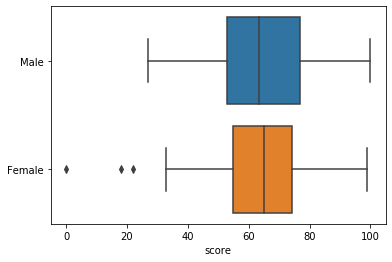

In [23]:
sns.boxplot(data = DF, orient = 'h').set(xlabel='score')

<h4><p>Написати функції:</h4></p>

<h5>Для оцінки вімінностей дисперсій між групами за критерієм Лівеня. Функція має повертати значення тесту та результат оцінки рівності дисперсій (significant або not significant).</h5>

In [26]:
def levene(data):
    df = len(data) - 1
    std1 = np.std(data.iloc[:,0])
    std2 = np.std(data.iloc[:,1])
    F = std1**2/std2**2 if(std1 > std2) else std2**2/std1**2
    krit_levene = pd.read_excel("Таблиця критичних значень для критерію Лівеня.xlsx")
    if (df > 20):
        F_table = krit_levene.iloc[21,12]
    elif (df > 15):
        F_table = krit_levene.iloc[df,11]
    elif (df > 15):
        F_table = krit_levene.iloc[df,10]
    else:
        F_table = krit_levene.iloc[df,df]
    return df, F, "Significiant" if (F < F_table) else "Not significant"

In [27]:
levene(DF)

(99, 1.0723475522662613, 'Significiant')

<h4>Для визначення відмінності між групами за критерієм Стьюдента в залежності від рівності/відмінності дисперсій. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).</h4>

In [28]:
def student(data, liven_sig):
    mean1 = np.mean(data.iloc[:,0])
    mean2 = np.mean(data.iloc[:,1])
    std1 = np.std(data.iloc[:,0])
    std2 = np.std(data.iloc[:,1])
    n = len(data)
    df = n+n-2
    if (liven_sig == "Significiant"):
        t = abs(mean1 - mean2)/np.sqrt(std1**2/n + std2**2/n)
    else:
        t = abs(mean1 - mean2)/np.sqrt((((n-1)*std1**2+(n-1)*std2**2)/df) * (1/n + 1/n))
    student_table = pd.read_excel("Таблиця критичних значень для критерію Стьюдента.xlsx")
    table_t = 0
    for i in range(len(student_table)):
        if(df < int(student_table.iloc[i,0])):
            if(df != student_table.iloc[i-1,0]):
                if((student_table.iloc[i,0]-df) >= abs(student_table.iloc[i-1,0]-df)):
                    table_t = student_table.iloc[i-1,1]
                else: 
                    table_t = student_table.iloc[i,1]
                break
            else:
                table_t = student_table.iloc[i-1,1]
                break
    return df, t, "Significiant" if (t < table_t) else "Not significant"

In [29]:
student(DF, levene(DF)[2])

(198, 0.5132668983905083, 'Significiant')

<h3 align=center>Перевірити розбіжність на між групами на даних з п. 1.</h3>

<h3>Сформувати висновок про взаємозв'язок між групами та про їх розбіжність.</h3>

<h4>Отримане значення теста Лівеня виявилося менше критичного, що означає , що ми приймаємо нульову гіпотезу і припускаємо однорідність дисперсій. 
За критерієм t-Стьюдента для незалежних вибірок, ми можемо прийняти нульову гіпотезу про рівність середніх (розраховане значення менше критичного)</h4>